In [1]:
import pandas as pd     
import numpy as np       
import matplotlib.pyplot as plt 
import seaborn as sns    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("D:\Advanced-training-Python-AIML\datasets\DailyDelhiClimateTrain.csv")


In [3]:
print(df.shape)       
print(df.columns)       
print(df.head())        


(1462, 5)
Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [5]:
print(df.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [7]:
print(df.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


In [8]:
print(df.duplicated().sum())

0


In [9]:
df['date'] = pd.to_datetime(df['date'],errors = 'coerce')

In [10]:
num_cols = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

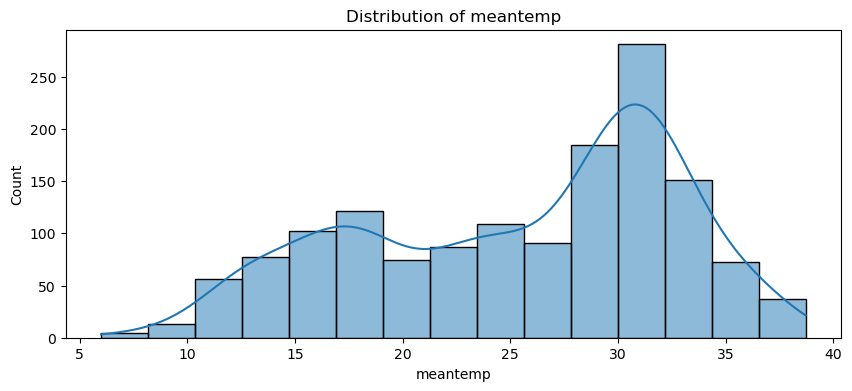

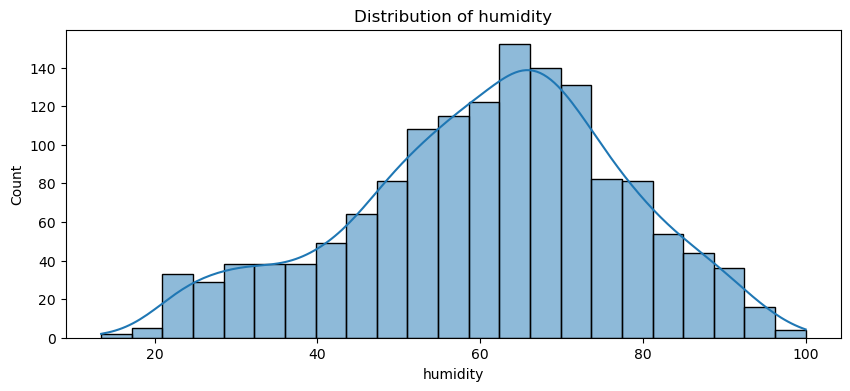

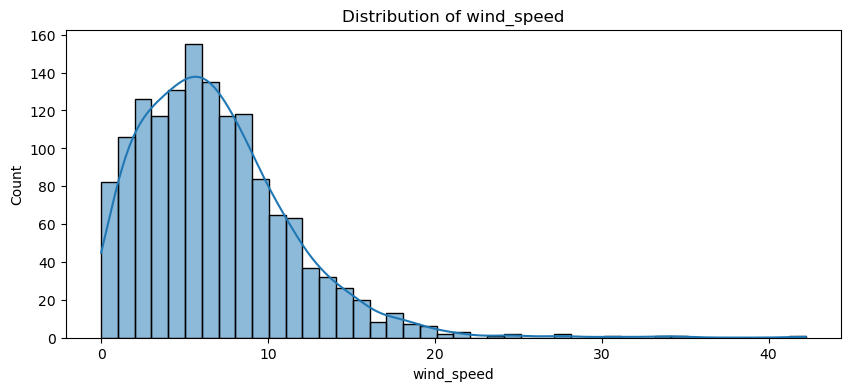

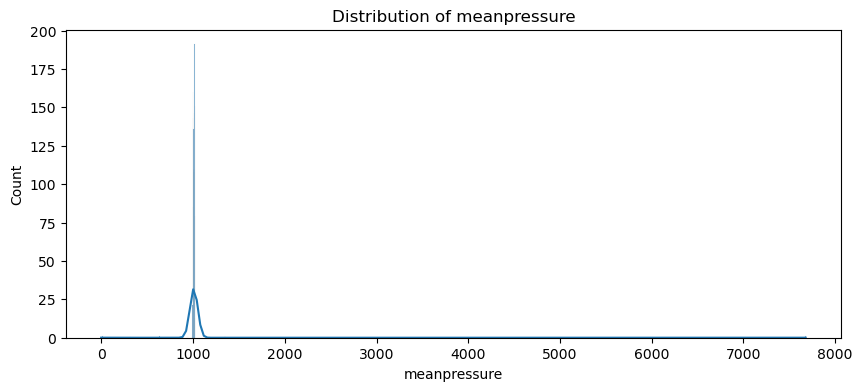

In [11]:
for col in num_cols:
    plt.figure(figsize = (10,4))
    sns.histplot(df[col], kde = True)
    plt.title(f'Distribution of {col}')
    plt.show()

              meantemp  humidity  wind_speed  meanpressure
meantemp      1.000000 -0.571951    0.306468     -0.038818
humidity     -0.571951  1.000000   -0.373972      0.001734
wind_speed    0.306468 -0.373972    1.000000     -0.020670
meanpressure -0.038818  0.001734   -0.020670      1.000000


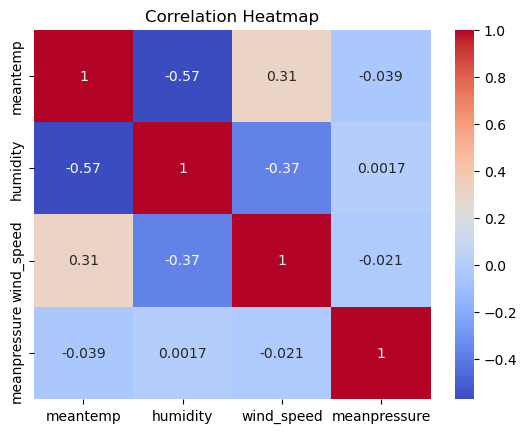

In [12]:
corr = df[num_cols].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


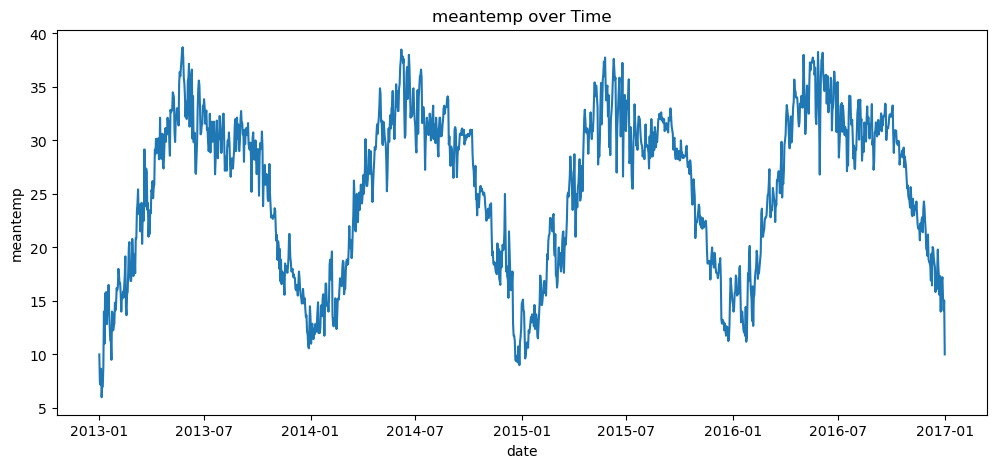

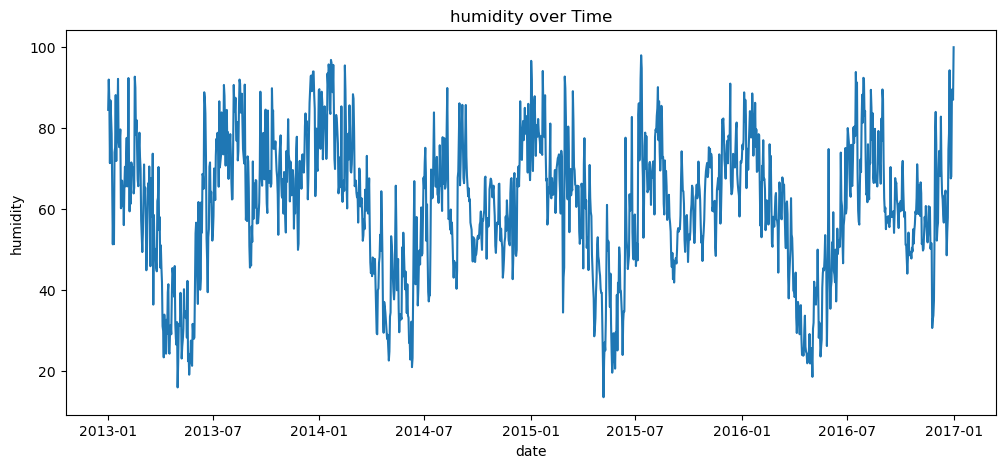

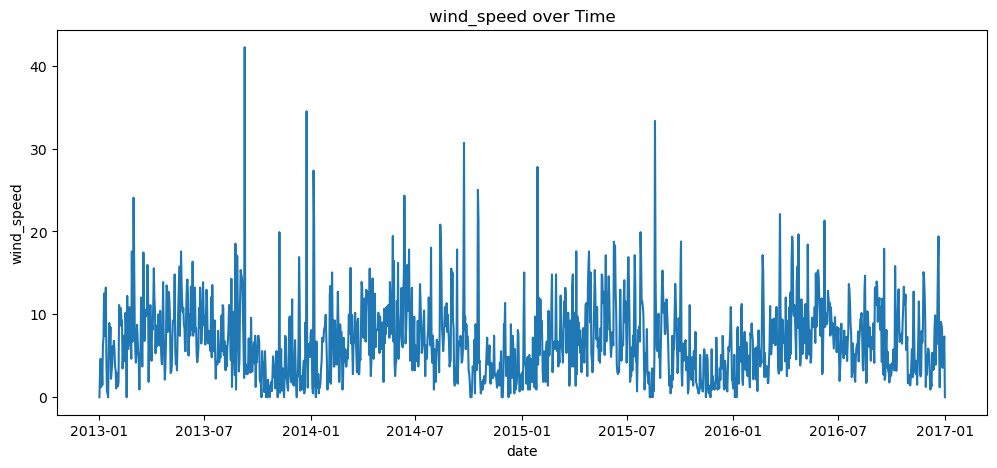

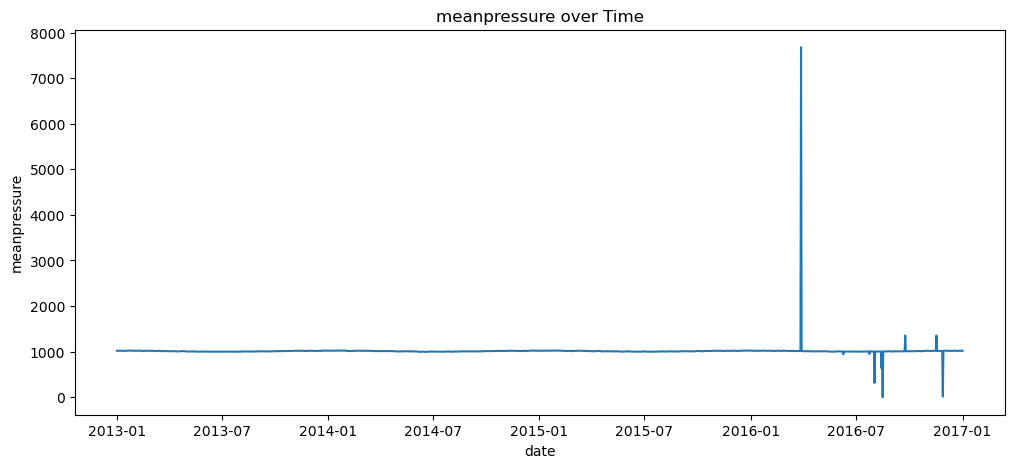

In [15]:
for col in num_cols:
    plt.figure(figsize=(12,5))
    sns.lineplot(x='date', y=col, data=df)
    plt.title(f'{col} over Time')
    plt.show()


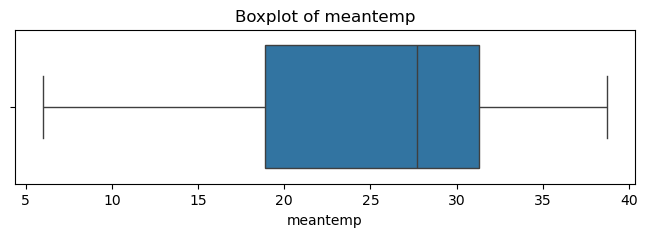

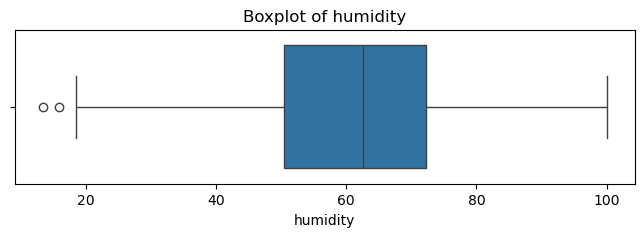

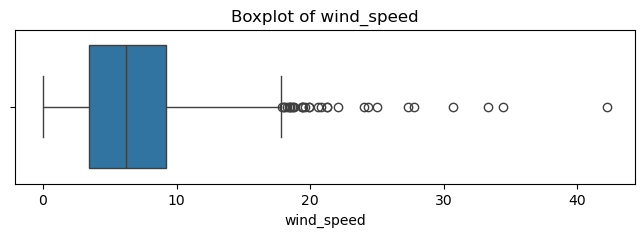

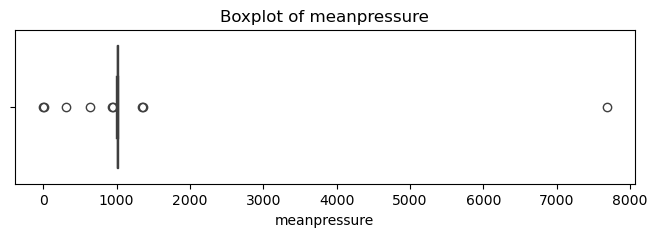

In [16]:
 for col in num_cols:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [24]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofyear'] = df['date'].dt.dayofyear

In [26]:
monthly_means = df.groupby(['year', 'month'])['meantemp'].mean().reset_index()


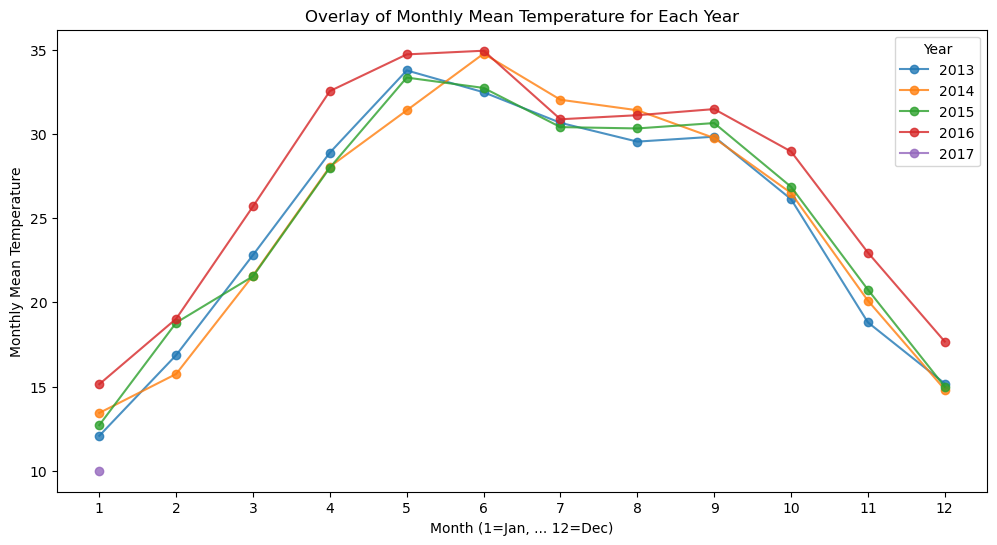

In [27]:
plt.figure(figsize=(12, 6))
for yr in sorted(monthly_means['year'].unique()):
    tmp = monthly_means[monthly_means['year'] == yr]
    plt.plot(tmp['month'], tmp['meantemp'], label=str(yr), marker='o', alpha=0.8)
plt.xlabel('Month (1=Jan, ... 12=Dec)')
plt.ylabel('Monthly Mean Temperature')
plt.title('Overlay of Monthly Mean Temperature for Each Year')
plt.legend(title='Year')
plt.xticks(range(1, 13))
plt.show()


In [47]:
monthly_means = df.groupby(['year', 'month'])[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].mean().reset_index()
print(monthly_means.columns)  # Check available columns


Index(['year', 'month', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')


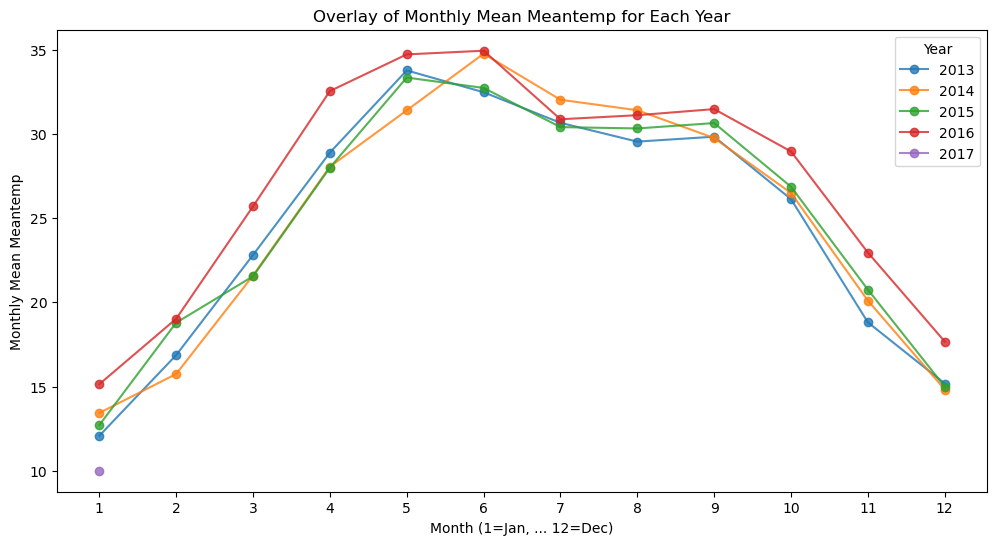

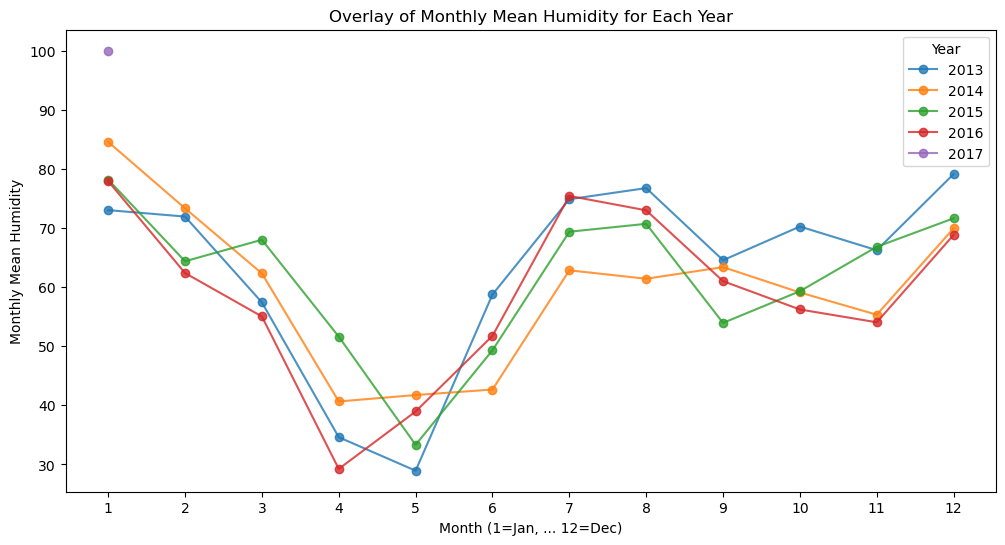

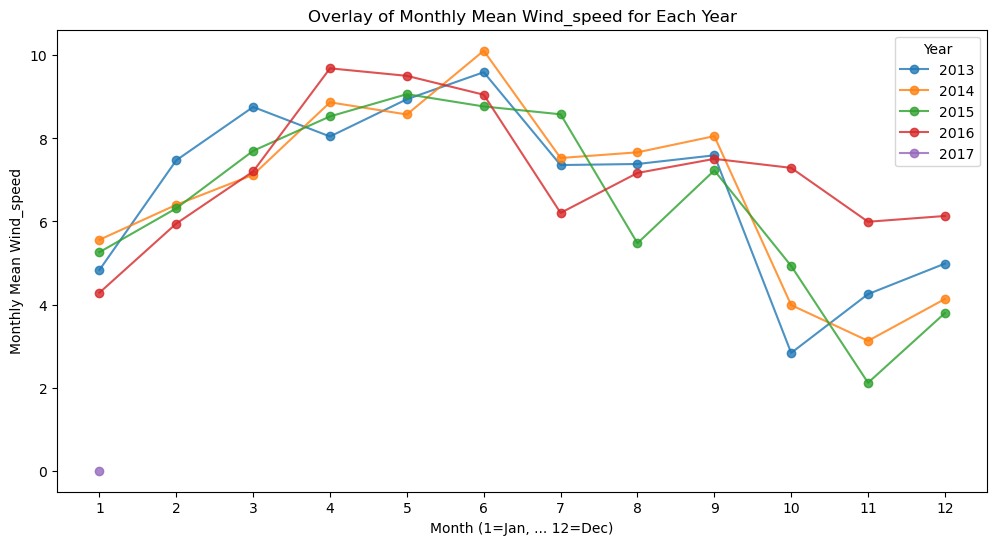

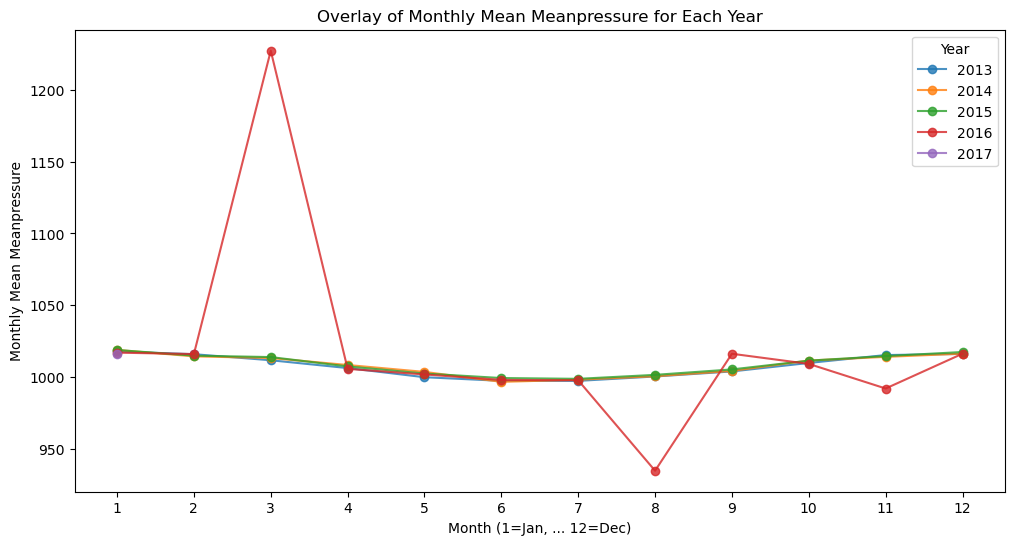

In [49]:
attributes = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

for attr in attributes:
    plt.figure(figsize=(12, 6))
    for yr in sorted(monthly_means['year'].unique()):
        tmp = monthly_means[monthly_means['year'] == yr]
        plt.plot(tmp['month'], tmp[attr], label=str(yr), marker='o', alpha=0.8)
    plt.xlabel('Month (1=Jan, ... 12=Dec)')
    plt.ylabel(f'Monthly Mean {attr.capitalize()}')
    plt.title(f'Overlay of Monthly Mean {attr.capitalize()} for Each Year')
    plt.legend(title='Year')
    plt.xticks(range(1, 13))
    plt.show()


In [29]:
# Drop rows with missing values (simple strategy)
df_clean = df.dropna(subset=num_cols)

# Features and target
y = df_clean['meantemp']
X = df_clean[['humidity', 'wind_speed', 'meanpressure']]

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Results")
    print(f"  MAE  : {mae:.3f}")
    print(f"  RMSE : {rmse:.3f}")
    print(f"  R2   : {r2:.3f}\n")
    return y_pred, model


In [51]:
from sklearn.model_selection import train_test_split

X = df[['humidity', 'wind_speed', 'meanpressure']]    
y = df['meantemp']                                   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
y_pred_lr, trained_lr = train_and_evaluate(lr, X_train, X_test, y_train, y_test)


LinearRegression Results
  MAE  : 5.203
  RMSE : 6.096
  R2   : 0.309



In [53]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
y_pred_dt, trained_dt = train_and_evaluate(dt, X_train, X_test, y_train, y_test)


DecisionTreeRegressor Results
  MAE  : 2.734
  RMSE : 3.695
  R2   : 0.746

